<h1 align="center"><font color="yellow">LangChain: Q&A over Documents</font></h1>

<font color="yellow">Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro</font>

<font color="orange">Um exemplo pode ser uma ferramenta que permita consultar um catálogo de produtos em busca de itens de interesse.</font>


```
pip install --upgrade langchain
```

In [1]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file


from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import CSVLoader
from langchain.vectorstores import DocArrayInMemorySearch
from IPython.display import display, Markdown


In [10]:
import pandas as pd

df = pd.read_csv("./myntra_products_catalog.csv")
df = df[:100]
df.head()


,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [3]:
df.shape

(100, 8)

In [12]:
df["Gender"].value_counts()

Gender
Men       39
Women     37
Unisex    17
Girls      4
Boys       3
Name: count, dtype: int64

In [4]:
#file = 'OutdoorClothingCatalog_1000.csv'
file ="/home/eddygiusepe/1_Eddy_Giusepe/3_estudando_LLMs/Large_Language_Models_LLMs/DeepLearningAI/LangChain_for_LLM_Application_Development/myntra_products_catalog.csv"
loader = CSVLoader(file_path=file)

In [5]:
from langchain.indexes import VectorstoreIndexCreator

```
pip install docarray
```

In [6]:
index = VectorstoreIndexCreator(vectorstore_cls=DocArrayInMemorySearch).from_loaders([loader])


In [25]:
query ="Por favor, liste todos os produtos apenas para crianças (boys) \
        em uma tabela de Markdown e resuma cada um deles. Traduza essa tabela \
        para o português."

In [26]:
response = index.query(query)


In [27]:
display(Markdown(response))



| Produto | Descrição | Preço (INR) |
|--------|-----------|-------------|
| U.S. Polo Assn. Kids Boys Maroon & Beige Printed Joggers | Calças jogger marrom e bege estampadas, tem cintura elástica com fecho de cordão, bainhas ajustadas, dois bolsos | 1049 |
| U.S. Polo Assn. Kids Boys White Printed Polo Collar T-shirt | T-shirt branca estampada, tem gola polo e mangas curtas | 899 |
| U.S. Polo Assn. Kids Boys Grey Melange & Navy Printed Polo Collar T-shirt | T-shirt cinza melange e azul marinho estampada, tem gola polo e mangas curtas | 909 |
| U.S. Polo Assn. Kids Boys Navy Blue & Red Striped Polo Collar T-shirt | T-shirt listrada azul marinho, vermelho e branco, tem gola polo e mangas longas | 959 |



<font color="orange">Agora vamos a abordar `Vector Database`</font>

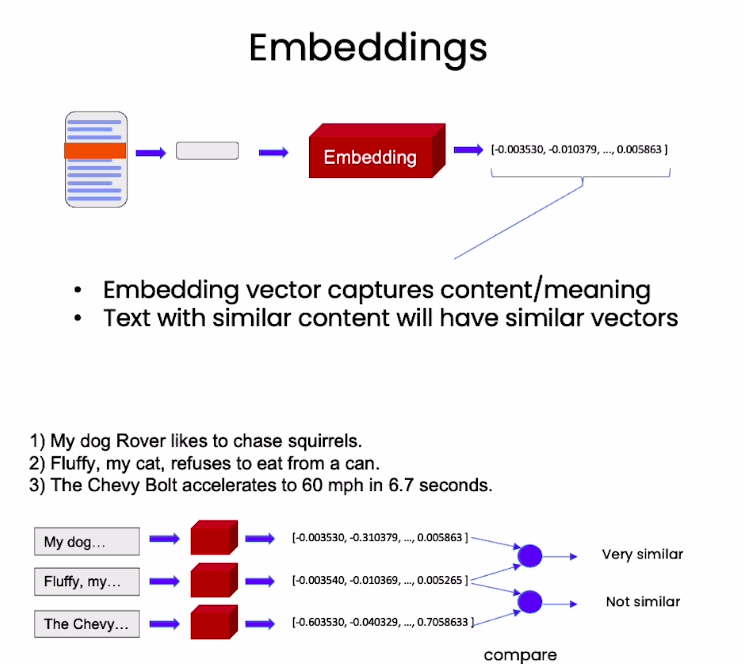

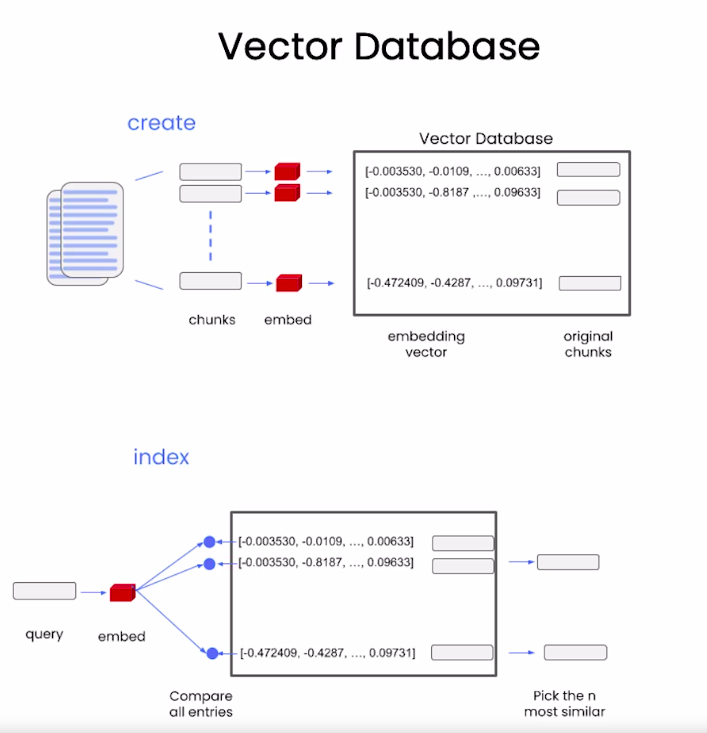

In [32]:
loader = CSVLoader(file_path=file)

docs = loader.load()

docs[0]

Document(page_content='ProductID: 10017413\nProductName: DKNY Unisex Black & Grey Printed Medium Trolley Bag\nProductBrand: DKNY\nGender: Unisex\nPrice (INR): 11745\nNumImages: 7\nDescription: Black and grey printed medium trolley bag, secured with a TSA lockOne handle on the top and one on the side, has a trolley with a retractable handle on the top and four corner mounted inline skate wheelsOne main zip compartment, zip lining, two compression straps with click clasps, one zip compartment on the flap with three zip pocketsWarranty: 5 yearsWarranty provided by Brand Owner / Manufacturer\nPrimaryColor: Black', metadata={'source': '/home/eddygiusepe/1_Eddy_Giusepe/3_estudando_LLMs/Large_Language_Models_LLMs/DeepLearningAI/LangChain_for_LLM_Application_Development/myntra_products_catalog.csv', 'row': 0})

In [41]:
from langchain.embeddings import OpenAIEmbeddings
embeddings = OpenAIEmbeddings(embedding_ctx_length=8191) # Default



embed = embeddings.embed_query("Olá, meu nome é Eddy Giusepe")

In [42]:
len(embed)

1536

In [43]:
db = DocArrayInMemorySearch.from_documents(docs,
                                           embeddings
                                          )


In [44]:
query = "Suggiera apenas produtos para crianças (boys)."

In [45]:
docs = db.similarity_search(query)


In [46]:
len(docs)

4

In [47]:
docs[0]

Document(page_content="ProductID: 10244421\nProductName: GAP Boys Logo Pull-On Pants\nProductBrand: GAP\nGender: Boys\nPrice (INR): 1299\nNumImages: 3\nDescription: Soft knitDrawstring ties at elasticized waistFront slant pocketsLogo at frontBanded cuffs keep from riding up baby's legs\nPrimaryColor: ", metadata={'source': '/home/eddygiusepe/1_Eddy_Giusepe/3_estudando_LLMs/Large_Language_Models_LLMs/DeepLearningAI/LangChain_for_LLM_Application_Development/myntra_products_catalog.csv', 'row': 10148})

In [48]:
retriever = db.as_retriever()

In [49]:
llm = ChatOpenAI(temperature = 0.0)


qdocs = "".join([docs[i].page_content for i in range(len(docs))])


In [52]:
response = llm.call_as_llm(f"{qdocs} Pergunta: Enumere todos os \
produtos apenas para crianças numa tabela markdown e resuma cada um deles.")

In [53]:
display(Markdown(response))


| ProductID  | ProductName                            | ProductBrand   | Gender | Price (INR) | NumImages | Description                                                                                          | PrimaryColor |
|------------|----------------------------------------|----------------|--------|-------------|-----------|------------------------------------------------------------------------------------------------------|--------------|
| 10244421   | GAP Boys Logo Pull-On Pants            | GAP            | Boys   | 1299        | 3         | Soft knitDrawstring ties at elasticized waistFront slant pocketsLogo at frontBanded cuffs keep from riding up baby's legs |              |
| 10244577   | GAP Baby Boy Graphic Raglan Sweatshirt | GAP            | Boys   | 1999        | 3         | Cozy fleeceContrast long raglan sleeves with banded cuffsContrast crewneckGraphic at chestBanded hem |              |
| 10050673   | You Got Plan B Boys Pack Of 3 Assorted Basic Briefs Marvel-ous Men - Boy Underwear | You Got Plan B | Boys   | 500         | 7         | Pack Of 3 Assorted Basic Briefs, each has a double-layered gusset mid-rise, outer-elastic |              |
| 10145313   | GAP Boys Logo Short Sleeve Tshirt      | GAP            | Boys   | 1299        | 3         | Standout, specially designed graphics let you be youSoft knitPanels at short sleevesCrewneckLogo at chest |              |

Resumo dos produtos:

1. GAP Boys Logo Pull-On Pants: Calças de malha macia com cordões na cintura elástica, bolsos frontais e punhos elásticos para evitar que subam nas pernas do bebê.

2. GAP Baby Boy Graphic Raglan Sweatshirt: Moletom aconchegante com mangas raglan contrastantes, punhos elásticos, gola contrastante, gráfico no peito e barra elástica.

3. You Got Plan B Boys Pack Of 3 Assorted Basic Briefs Marvel-ous Men - Boy Underwear: Pacote com 3 cuecas básicas sortidas, cada uma com uma gusset de camada dupla, cintura média e elástico externo.

4. GAP Boys Logo Short Sleeve Tshirt: Camiseta de malha macia com gráficos especialmente projetados, painéis nas mangas curtas, gola redonda e logotipo no peito.

In [54]:
qa_stuff = RetrievalQA.from_chain_type(
    llm=llm, 
    chain_type="stuff", 
    retriever=retriever, 
    verbose=True
)


In [55]:
query =  "Liste todos os produtos apenas para crianças (boys) \
          numa tabela Markdown e resuma cada uma delas."

In [56]:
response = qa_stuff.run(query)




> Entering new  chain...

> Finished chain.


In [57]:
display(Markdown(response))

| ProductID | ProductName                                      | ProductBrand | Gender | Price (INR) | NumImages | Description                                                                                          | PrimaryColor |
|-----------|--------------------------------------------------|--------------|--------|-------------|-----------|------------------------------------------------------------------------------------------------------|--------------|
| 10244677  | GAP Boys Toddler Slim Jeans with Fantastiflex     | GAP          | Boys   | 1999        | 3         | Smooth canvas weaveDrawstring ties at elasticized waist, faux flyFive-pocket styling                  |              |
| 10244421  | GAP Boys Logo Pull-On Pants                      | GAP          | Boys   | 1299        | 3         | Soft knitDrawstring ties at elasticized waistFront slant pocketsLogo at frontBanded cuffs keep from riding up baby's legs |              |
| 10239187  | Gini and Jony Boys Blue Printed T-shirt          | Gini and Jony| Boys   | 1049        | 3         | Blue printed T-shirt, has a polo collar, and short sleeves                                          | Blue         |
| 10244575  | GAP Baby Boys Printed Long Sleeve Bodysuit        | GAP          | Boys   | 699         | 4         | Soft jersey knitLapped shoulders, long sleevesCrewneckSnaps at inseam for easy dressing and diaperingAllover print |              |

Resumo dos produtos:

1. GAP Boys Toddler Slim Jeans with Fantastiflex: Calças jeans slim para meninos pequenos, com tecido liso, cordão na cintura elástica e estilo de cinco bolsos.

2. GAP Boys Logo Pull-On Pants: Calças de malha macia para meninos, com cordão na cintura elástica, bolsos frontais inclinados, logotipo na frente e punhos para evitar que subam nas pernas do bebê.

3. Gini and Jony Boys Blue Printed T-shirt: Camiseta azul estampada para meninos, com gola polo e mangas curtas.

4. GAP Baby Boys Printed Long Sleeve Bodysuit: Macacão de manga longa estampado para bebês meninos, feito de malha de jersey macia, com ombros sobrepostos, gola redonda e botões de pressão na virilha para facilitar o vestir e trocar fraldas.

In [ ]:
response = index.query(query, llm=llm)

In [ ]:
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch,
    embedding=embeddings,
).from_loaders([loader])

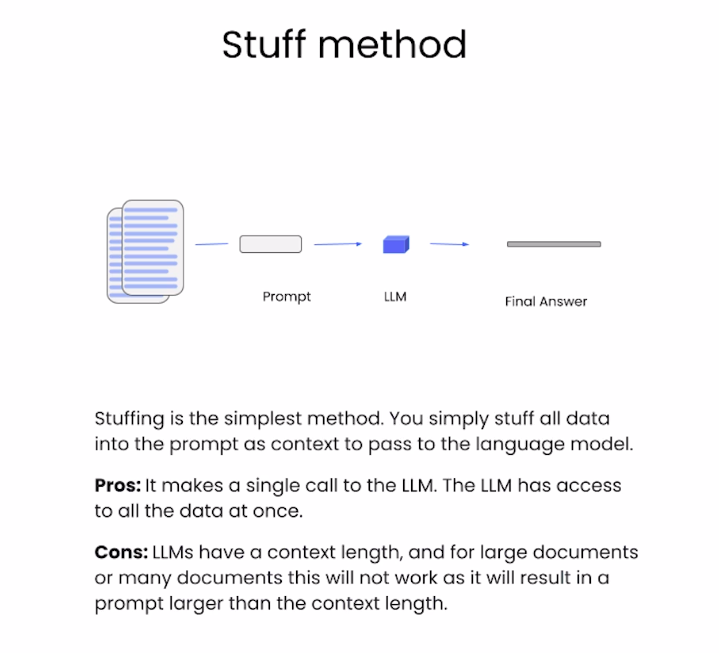

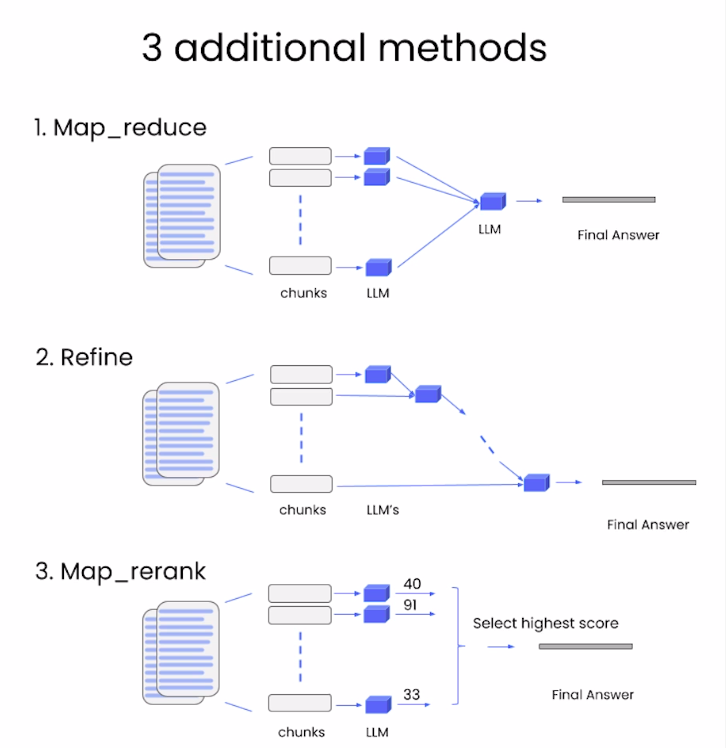